# 花朵图像五分类

同济子豪兄

2022-7-16

花朵五分类数据集：https://www.kaggle.com/datasets/alxmamaev/flowers-recognition

## 进入 mmclassification 目录

In [1]:
import os
os.chdir('mmclassification')

## 导入工具包

In [2]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('device', device)

device cuda:0


## 下载数据集

In [3]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/flower.zip -O data/flower.zip

--2022-07-16 22:34:18--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/flower.zip
Connecting to 172.16.0.13:5848... connected.
Proxy request sent, awaiting response... 200 OK
Length: 230662310 (220M) [application/zip]
Saving to: ‘data/flower.zip’

data/flower.zip     100%[===================>] 219.98M  27.9MB/s    in 7.8s    

2022-07-16 22:34:28 (28.3 MB/s) - ‘data/flower.zip’ saved [230662310/230662310]



In [4]:
# 解压
!unzip data/flower.zip -d data >> /dev/null

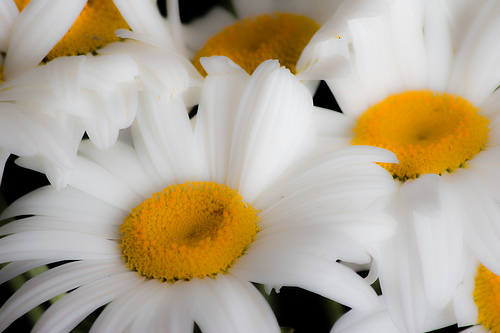

In [13]:
from PIL import Image
Image.open('data/flower/test/daisy/11023214096_b5b39fab08.jpg')

## 数据集目录结构

In [21]:
'''
flower
    ├── classes.txt
    ├── train.txt
    ├── val.txt
    ├── test.txt
    ├── train
    │   ├── daisy
    │   ├── dandelion
    │   ├── rose
    │   ├── sunflower
    │   └── tulip
    ├── test
    │   ├── daisy
    │   ├── dandelion
    │   ├── rose
    │   ├── sunflower
    │   └── tulip
    └── val
        ├── daisy
        ├── dandelion
        ├── rose
        ├── sunflower
        └── tulip

'''

## 下载 config 配置文件

In [30]:
'''
Model config, which specify the basic structure of the model, e.g. number of the input channels.
Dataset config, which contains details about the dataset, e.g. type of the dataset.
Schedule config, which specify the training schedules, e.g. learning rate.
Runtime config, which contains the rest of details, e.g. log config.
'''

In [11]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/configs/mobilenet_v2_1x_flower.py -O configs/mobilenet_v2/mobilenet_v2_1x_flower.py


--2022-07-16 22:51:45--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/configs/mobilenet_v2_1x_flower.py
Connecting to 172.16.0.13:5848... connected.
Proxy request sent, awaiting response... 200 OK
Length: 1975 (1.9K) [binary/octet-stream]
Saving to: ‘configs/mobilenet_v2/mobilenet_v2_1x_flower.py’

configs/mobilenet_v 100%[===================>]   1.93K  --.-KB/s    in 0s      

2022-07-16 22:51:45 (8.72 MB/s) - ‘configs/mobilenet_v2/mobilenet_v2_1x_flower.py’ saved [1975/1975]



## 命令行-训练

In [12]:
!python tools/train.py \
        configs/mobilenet_v2/mobilenet_v2_1x_flower.py \
        --work-dir work_dirs/mobilenet_v2_1x_flower

/home/featurize/work/MMClassification教程/mmclassification/mmcls/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/home/featurize/work/MMClassification教程/mmclassification/mmcls/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
2022-07-16 22:51:55,465 - mmcls - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.10 (default, Jun  4 2021, 14:48:32) [GCC 7.5.0]
CUDA available: True
GPU 0: NVIDIA RTX A4000
CUD

## 用训练得到的图像分类模型，对新图像预测

load checkpoint from local path: work_dirs/mobilenet_v2_1x_flower/latest.pth
类别 daisy 置信度 0.9996930360794067


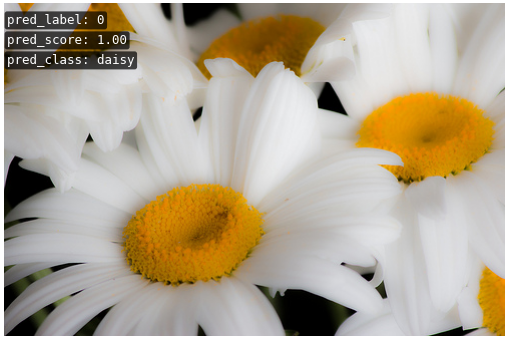

In [16]:
import matplotlib.pyplot as plt
import mmcv
from mmcls.apis import inference_model, init_model, show_result_pyplot

img = mmcv.imread('data/flower/test/daisy/11023214096_b5b39fab08.jpg')
# img = mmcv.imread('data/cat2.jpg')


# 图像分类模型 config 配置文件
config_file = 'configs/mobilenet_v2/mobilenet_v2_1x_flower.py'
# 图像分类模型 checkpoint 权重文件
checkpoint_file = 'work_dirs/mobilenet_v2_1x_flower/latest.pth'
# 通过 config 配置文件 和 checkpoint 权重文件 构建模型
model = init_model(config_file, checkpoint_file, device=device)

result = inference_model(model, img)
print('类别', result['pred_class'], '置信度', result['pred_score'])

show_result_pyplot(model, img, result)

## 将训练得到的模型在测试集上预测，获得所有测试集数据的预测结果

In [17]:
!python tools/test.py \
        configs/mobilenet_v2/mobilenet_v2_1x_flower.py \
        work_dirs/mobilenet_v2_1x_flower/latest.pth \
        --out testset_result.json

/home/featurize/work/MMClassification教程/mmclassification/mmcls/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/home/featurize/work/MMClassification教程/mmclassification/mmcls/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
load checkpoint from local path: work_dirs/mobilenet_v2_1x_flower/latest.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 715/715, 358.6 task/s, elapsed: 2s, ETA:     0s
dumping results to results_flower.json


## 将训练得到的模型在测试集上预测，获得图像分类评估结果

In [18]:
!python tools/test.py \
        configs/mobilenet_v2/mobilenet_v2_1x_flower.py \
        work_dirs/mobilenet_v2_1x_flower/latest.pth \
        --metrics accuracy precision recall f1_score support \
        --metric-options topk=1


/home/featurize/work/MMClassification教程/mmclassification/mmcls/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/home/featurize/work/MMClassification教程/mmclassification/mmcls/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
load checkpoint from local path: work_dirs/mobilenet_v2_1x_flower/latest.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 715/715, 352.3 task/s, elapsed: 2s, ETA:     0s
accuracy : 88.67

support : 715.0

precision : 89.77

recall : 88.83

f1_score : 88.8
